## Telecom Customer Churn

### Business goal:
####  Identify customers who will leave so the company can stop revenue loss.

### Customer Churn (Yes/No)
#### This is Binary Classification

In [64]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from xgboost import XGBClassifier

In [66]:
data = pd.read_csv("CustomerChurn.csv")

In [68]:
data .head()

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoyaltyID          7043 non-null   int64  
 1   Customer ID        7043 non-null   object 
 2   Senior Citizen     7043 non-null   object 
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   Tenure             7043 non-null   int64  
 6   Phone Service      7043 non-null   object 
 7   Multiple Lines     7043 non-null   object 
 8   Internet Service   7043 non-null   object 
 9   Online Security    7043 non-null   object 
 10  Online Backup      7043 non-null   object 
 11  Device Protection  7043 non-null   object 
 12  Tech Support       7043 non-null   object 
 13  Streaming TV       7043 non-null   object 
 14  Streaming Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless Billing  7043 

In [72]:
data.isnull().sum()

LoyaltyID            0
Customer ID          0
Senior Citizen       0
Partner              0
Dependents           0
Tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

In [74]:
data.duplicated().sum()

0

In [76]:
data = data.drop(columns=["LoyaltyID","Customer ID"])

In [78]:
data.shape

(7043, 19)

In [80]:
data.head()

,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [82]:
data["Internet Service"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [84]:
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')

In [86]:
data['Total Charges'].fillna(data['Total Charges'].median(), inplace=True)
data.dropna(subset=['Total Charges'], inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_11164\323111689.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Total Charges'].fillna(data['Total Charges'].median(), inplace=True)


In [88]:
data.isnull().sum()

Senior Citizen       0
Partner              0
Dependents           0
Tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

### Define features

In [91]:
X = data.drop(columns=["Churn"])
y = data["Churn"]

x_train , x_test , y_train , y_test = train_test_split(
    X, y ,test_size = 0.2,stratify=y,random_state=42
)

categorical_features = X.select_dtypes(include="object").columns.tolist()
numeric_features = X.select_dtypes(exclude="object").columns.tolist()

### Preprocessing pipeline

In [94]:
preprocessor = ColumnTransformer(transformers=[
    ("num",StandardScaler(),numeric_features),
    ("cat",OneHotEncoder(handle_unknown="ignore"),categorical_features)
])

### Train a Model 

In [97]:
clf = Pipeline(
    steps=[
        ("preprocess",preprocessor),
        ("model",LogisticRegression(class_weight='balanced'))
    ]
)

clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.90      0.72      0.80      1035
         Yes       0.50      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



### XGBOOSTCLASSIFIRE

In [100]:
data['Churn'] = data['Churn'].map({'No': 0, 'Yes': 1})

In [102]:
y = data["Churn"]
X = data.drop(columns=["Churn"])

In [104]:
data["Churn"].unique()

array([0, 1], dtype=int64)

### Handle Imbalanced Data for XGBoost

XGBoost is penalize errors on the minority class more heavily.

In [108]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [110]:
categorical_features = X.select_dtypes(include="object").columns.tolist()
numeric_features = X.select_dtypes(exclude="object").columns.tolist()

In [112]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)


In [114]:
neg = sum(y == 0)
pos = sum(y == 1)

scale_pos_weight = neg / pos
print(scale_pos_weight)


2.7683253076511503


In [116]:
xgclf = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", XGBClassifier(scale_pos_weight=scale_pos_weight,
                                eval_metric='logloss',
                                random_state=42)
        )
    ]
)

xgclf.fit(X_train, y_train)

y_pred = xgclf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1035
           1       0.53      0.66      0.59       374

    accuracy                           0.75      1409
   macro avg       0.70      0.72      0.70      1409
weighted avg       0.77      0.75      0.76      1409



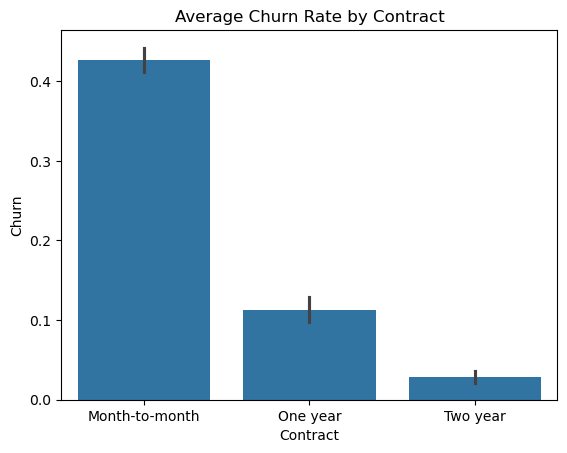

In [117]:
sns.barplot(
    x="Contract",
    y="Churn",
    data=data
)
plt.title("Average Churn Rate by Contract")
plt.show()


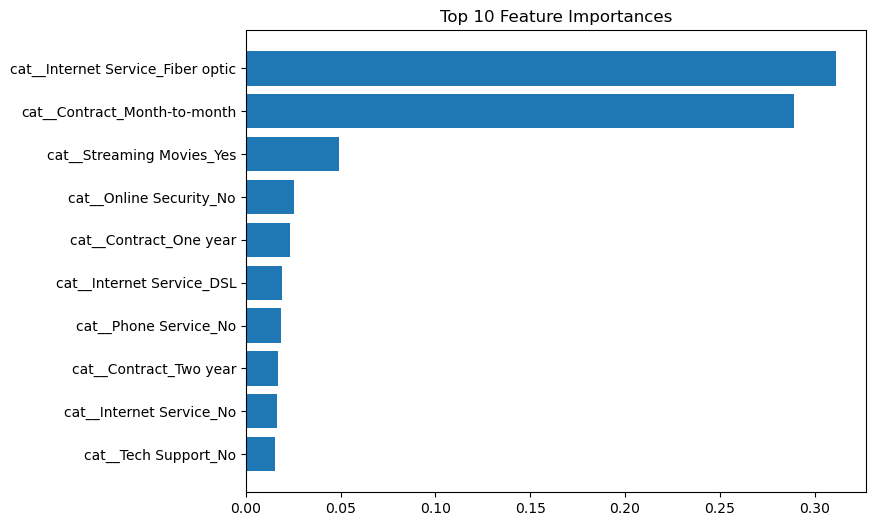

In [122]:
import pandas as pd
import numpy as np

# Get feature names after preprocessing
feature_names = xgclf.named_steps['preprocess'].get_feature_names_out()

# Get importance values
importances = xgclf.named_steps['model'].feature_importances_

# Create dataframe
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8,6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances')
plt.show()


              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1035
           1       0.53      0.66      0.59       374

    accuracy                           0.75      1409
   macro avg       0.70      0.72      0.70      1409
weighted avg       0.77      0.75      0.76      1409



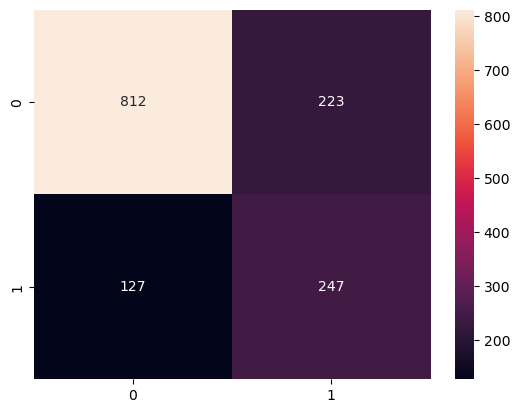

In [130]:
y_pred = xgclf.predict(X_test)

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.show()

In [132]:
from lifelines import KaplanMeierFitter

In [133]:
data["Churn_event"] = data["Churn"]

In [134]:
data[["Tenure", "Churn"]].isnull().sum()

Tenure    0
Churn     0
dtype: int64

### Overall Customer Survival

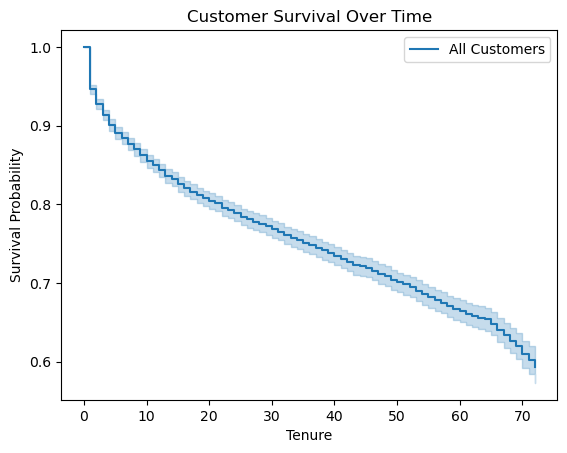

In [139]:
kmf = KaplanMeierFitter()

kmf.fit(
    durations=data["Tenure"],
    event_observed=data["Churn"],
    label="All Customers"
)

kmf.plot()
plt.title("Customer Survival Over Time")
plt.xlabel("Tenure")
plt.ylabel("Survival Probability")
plt.show()

“This shows how customer survival decreases over time.
Most churn happens in the early months, which highlights the importance of early engagement.”

### Survival by Contract Type

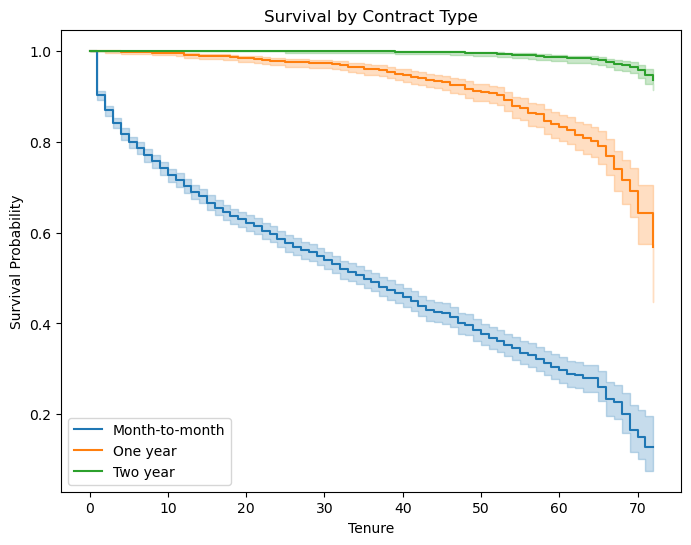

In [143]:
plt.figure(figsize=(8,6))
kmf = KaplanMeierFitter()

for contract in data["Contract"].unique():
    mask = data["Contract"] == contract
    
    kmf.fit(
        data.loc[mask, "Tenure"],
        data.loc[mask, "Churn_event"],
        label=contract
    )
    kmf.plot_survival_function()

plt.title("Survival by Contract Type")
plt.xlabel("Tenure")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()


“Month-to-month customers churn much earlier than customers on one-year or two-year contracts.
This suggests long-term contracts help improve retention

### Survival by Payment Method

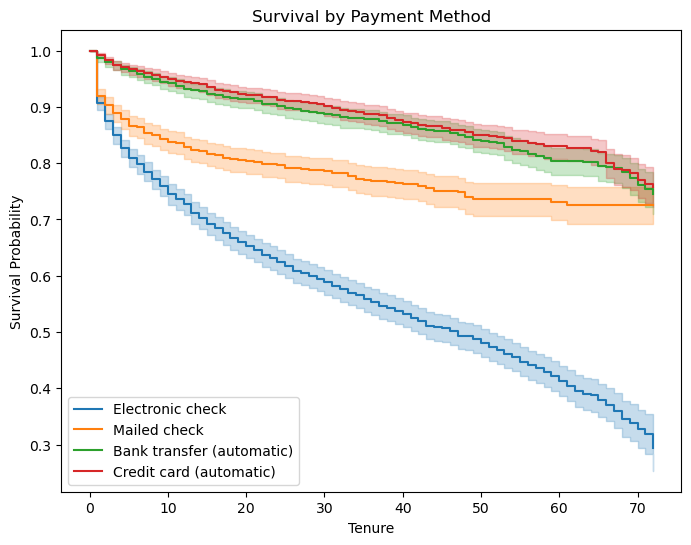

In [147]:
plt.figure(figsize=(8,6))
kmf = KaplanMeierFitter()

for method in data["Payment Method"].unique():
    mask = data["Payment Method"] == method
    
    kmf.fit(
        data.loc[mask, "Tenure"],
        data.loc[mask, "Churn_event"],
        label=method
    )
    kmf.plot_survival_function()

plt.title("Survival by Payment Method")
plt.xlabel("Tenure")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()

Customers using electronic check tend to churn faster than those using automatic payment methods.
This may be due to payment friction or missed payments.”

### Survival by Internet Service Type

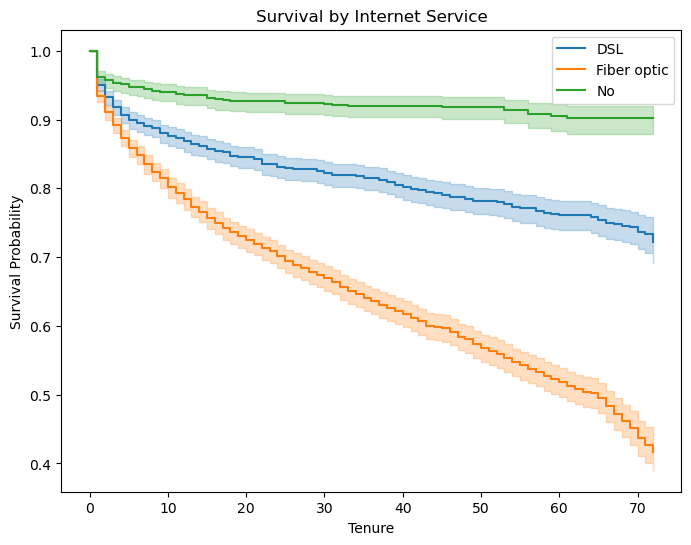

In [151]:
plt.figure(figsize=(8,6))
kmf = KaplanMeierFitter()

for service in data["Internet Service"].unique():
    mask = data["Internet Service"] == service
    
    kmf.fit(
        data.loc[mask, "Tenure"],
        data.loc[mask, "Churn_event"],
        label=service
    )
    kmf.plot_survival_function()

plt.title("Survival by Internet Service")
plt.xlabel("Tenure")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()

“Fiber optic customers show higher churn compared to other services, possibly due to higher cost or service expectations.”

### Survival by Monthly Charges (Binned)

In [155]:
data["MonthlyCharges_group"] = pd.qcut(
    data["Monthly Charges"],
    q=3,
    labels=["Low", "Medium", "High"]
)

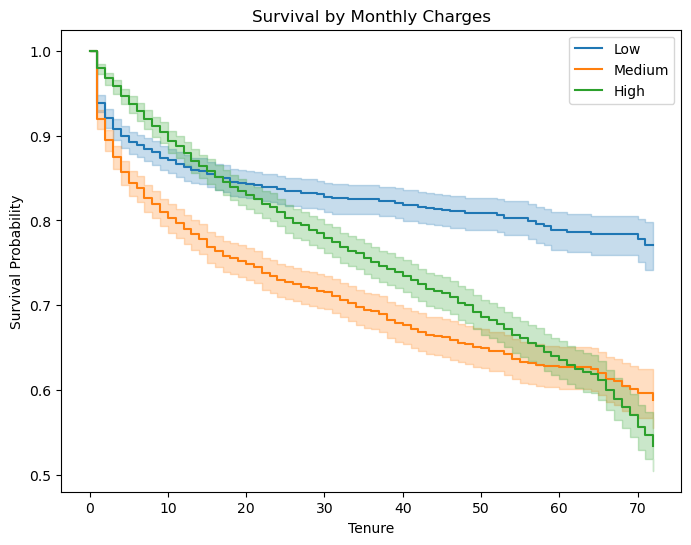

In [157]:
plt.figure(figsize=(8,6))
kmf = KaplanMeierFitter()

for grp in data["MonthlyCharges_group"].unique():
    mask = data["MonthlyCharges_group"] == grp
    
    kmf.fit(
        data.loc[mask, "Tenure"],
        data.loc[mask, "Churn_event"],
        label=grp
    )
    kmf.plot_survival_function()

plt.title("Survival by Monthly Charges")
plt.xlabel("Tenure")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()

Customers with higher monthly charges tend to churn faster, indicating price sensitivity or perceived value issues.”

In [180]:
y_proba = xgclf.predict_proba(X_test)[:, 1]
y_pred_custom = (y_proba >= 0.4).astype(int)

In [184]:
print(y_pred_custom)

[0 1 0 ... 0 1 0]


In [186]:
print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.88      0.73      0.79      1035
           1       0.49      0.72      0.58       374

    accuracy                           0.72      1409
   macro avg       0.68      0.72      0.69      1409
weighted avg       0.77      0.72      0.74      1409



In [200]:
threshold = 0.40
y_pred_threshold = (y_proba >= threshold).astype(int)
# prob_churn = np.where(y_proba >= threshold , "churn" ,"no churn")
print(y_pred_threshold)

[0 1 0 ... 0 1 0]


In [202]:
import joblib
joblib.dump(xgclf,"costomer_churn_pipline.pkl")

['costomer_churn_pipline.pkl']